# 3-3. 산점도 (Scatter plot)

## 3-3-1. 기본적인 산점도

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [2]:
startyear = 2000
endyear = 2019
minLat = 40
maxLat = 50
minLon = 320
maxLon = 330

In [3]:
def get_var(varname):
    f=Dataset(varname+".mon.mean.nc", "r")
    lat=np.squeeze(f.variables["lat"][:]) #lat 좌표값  
    lon=np.squeeze(f.variables["lon"][:]) #lon 좌표값
    ind_lat = np.logical_and(lat>=minLat, lat<=maxLat) #Boolean 형태의 array
    ind_lon = np.logical_and(lon>=minLon, lon<=maxLon) #Boolean 형태의 array
    nlat, nlon=ind_lat.sum(), ind_lon.sum()
    
    time=np.squeeze(f.variables["time"][:])
    #print(time) #datetime64[ns] 형태로 저장되어 있음. 
    #1800년도를 기준으로 몇시간 뒤인지 형태로 저장되어있음..;
    #1297320 = (1948-1800까지의 총 일 수 = 54,055일) *24  hrs
    time=np.array([date(1800,1,1)+timedelta(hours=x) for x in time])
    #그래서 기준이 되는 1800년 1월 1일에 timedelta 를 더해주면 
    #[yyyy-mm-dd] 형태로 날짜가 변환이 될 수 있는 것이지
    #미친거 아님?
    #결론 : 걍 xarray 쓰셈
    
    years=np.array([x.year for x in time])
    #print(time[0].year) #1948 출력
    
    months=np.array([x.month for x in time])
    ind_time=np.logical_and(years>=startyear, years<=endyear)
    #ind_time 은 Boolean 형태의 array
    time=time[ind_time]
    #ind_time에서 True 값인 애들만 추림
    #time.shape 찍으면 (240, )
    #time에는 'yyyy-mm-dd' 형태로 저장되어있음
    years=years[ind_time]
    #years에는 yyyy만 저장되어있음
    #대신 dimension은 240 으로 동일함
    #즉, 1948-01-01 ~ 1948-12-01 은 모두 1948로 연도 정보만 저장
    months=months[ind_time]
    #months에는 mm만 저장되어있음
    #dimension은 240으로 동일함.
    #즉, 1 2 3 4 5 6 7 8 9 10 11 12 로 연도정보 없이 월 정보만 저장.
    
    season = np.zeros_like(months, dtype=np.int16)
    #months와 동일한 모양의 0으로 채워진 array
    season[np.logical_and(months>=3, months<=5)]=1 #MAM
    season[np.logical_and(months>=6, months<=8)]=2 #JJA
    season[np.logical_and(months>=9, months<=11)]=3 #SON
    #season은 계절 정보가 담긴 array
    
    var=np.squeeze(f.variables[varname][ind_time,ind_lat,ind_lon])
    #print(var)
    print(np.shape(var))
    return(months, season,var)

months, season, air = get_var("air")
_, season2, rhum = get_var("rhum")

print(months)

(240, 5, 5)
(240, 5, 5)
[ 1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12
  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12
  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12
  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12
  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12
  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12
  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12
  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12
  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12
  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12]


In [4]:
import xarray as xr

In [5]:
temp_path = './air.mon.mean.nc'
temp_nc = xr.open_dataset(temp_path)

In [6]:
temp_nc

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 894)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-06-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [7]:
f=Dataset("air.mon.mean.nc", "r")

In [8]:
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    description: Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma level values
    platform: Model
    Conventions: COARDS
    NCO: 20121012
    history: Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc air.mon.mean.nc
Thu May  4 18:11:50 2000: ncrcat -d time,0,622 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc ./surface/air.mon.mean.nc
Mon Jul  5 23:47:18 1999: ncrcat ./air.mon.mean.nc /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/surface/air.mon.mean.nc
/home/hoop/crdc/cpreanjuke2farm/cpreanjuke2farm Mon Oct 23 21:04:20 1995 from air.sfc.gauss.85.nc
created 95/03/13 by Hoop (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2014/09
    title: monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    Re

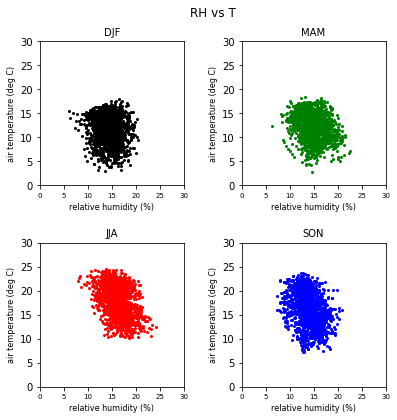

In [10]:
fig, ax = plt.subplots(2,2, figsize=(6,6))
colors = ["k","g",'r','b']
season_name = ["DJF","MAM","JJA","SON"]
xticks = np.arange(70,100+5,5)
yticks = np.arange(0, 30+5, 5)

for i in range(2):
    for j in range(2):
        s=2*i+j #ax[i][j] subplot에 나타낼 자료의 계절 (0~3)
        ax[i][j].plot(rhum[season2==s,:,:].reshape(-1), air[season==s,:,:].reshape(-1),
                     color = colors[s], linewidth = 0, marker='o', markersize=2)
        
        ax[i][j].axis((70,100,0,30))
        ax[i][j].set_xlabel("relative humidity (%)", fontsize=8)
        ax[i][j].set_xticks(xticks)
        ax[i][j].set_xticklabels([str(x) for x in xticks], fontsize=7)
        ax[i][j].set_ylabel("air temperature (deg C)", fontsize=8)
        ax[i][j].set_yticks(yticks)
        ax[i][j].set_xticklabels([str(y) for y in yticks], fontsize=7)
        ax[i][j].set_title(season_name[s], fontsize=10)

plt.suptitle("RH vs T", fontsize=12)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9,
                   wspace=0.4, hspace=0.4)
plt.show()

In [39]:
rhum[season2==2]

#season2는 (240,)의 array로
#rhum의 첫번째 dimension인 time과 그 크기가 같다.
#그래서 비교가 가능한 것 같음. #masking의 기능인듯.
#season2==2 season이 2인 time만 슬라이싱함 (lat,lon) 은 그대로 (5,5) 유지
#만약 season2에 없는 값인 5를 집어넣으면,
#ex rhum[season==5]
#(0,5,5) 해당하는 값이 없으므로 time dimension 은 0이 되어버린다. 

#이해를 위해 latitude와 동일한 정보를 가진 array를 만들고 동일한 과정을 반복해보았음.

masked_array(
  data=[[[84.724   , 83.866   , 85.17333 , 86.86466 , 86.82333 ],
         [84.233   , 82.82467 , 83.899666, 85.266   , 84.85733 ],
         [83.332   , 83.474   , 83.649   , 83.207   , 81.915665],
         [82.891   , 82.899   , 81.791664, 82.008   , 82.79033 ],
         [83.198   , 83.07366 , 81.63966 , 80.916   , 81.83233 ]],

        [[87.24968 , 86.507095, 87.44225 , 88.93484 , 88.950645],
         [86.84516 , 84.13548 , 83.90871 , 85.15871 , 85.68387 ],
         [84.97419 , 84.64355 , 83.74838 , 82.98968 , 82.36774 ],
         [83.74032 , 83.200645, 81.772575, 82.12807 , 82.80419 ],
         [81.01451 , 80.965485, 81.05419 , 81.78903 , 82.08645 ]],

        [[89.7971  , 88.62742 , 88.80516 , 89.5229  , 88.36161 ],
         [85.99871 , 84.19225 , 85.30516 , 87.07064 , 86.022575],
         [83.5958  , 84.14323 , 85.11161 , 86.07161 , 85.3371  ],
         [84.74871 , 84.160645, 83.55581 , 85.01581 , 86.466774],
         [85.450325, 83.910324, 83.104195, 83.32226 , 83.4

In [30]:
r = rhum[months==12]
r.shape

(20, 5, 5)

In [42]:
ms = np.zeros_like(months, dtype=np.int16)
ms[0]=1
ms
latitude = np.arange(40.,52.5,2.5)
latitude.shape

(5,)

In [43]:
rh = rhum[:,latitude==40,:]
rh.shape

(240, 1, 5)